#Najważniejsze stwierdzenia
1. MCP to otwarty standard, zapoczątkowany przez Anthropic, mający na celu połączenie LLM z zewnętrznymi danymi i narzędziami.  ￼
2. MCP rozwiązuje problem „N x M integrations” — integrujesz narzędzie raz, a wiele modeli może z niego korzystać.  ￼
3. Amplitude i inne firmy udostępniają MCP-serwery (np. Amplitude MCP) zamiast budować własne LLM.  ￼
4. Chrome DevTools MCP istnieje i pokazuje jak narzędzia z UI (przeglądarka/DevTools) mogą być expose’owane jako MCP-serwery.  ￼
5. Istnieją realne incydenty bezpieczeństwa związane z MCP / supply-chain (złośliwy pakiet MCP potrafił kraść e-maile) — trzeba traktować bezpieczeństwo poważnie.  ￼


#Konfiguracja serwera MCP w VSC

- https://github.com/ChromeDevTools/chrome-devtools-mcp/?tab=readme-ov-file#chrome-devtools-mcp

- W ustawieniach dodaje kilka linijek tekstu

In [ ]:
{
    "files.autoSave": "afterDelay",
    "breadcrumbs.enabled": false,
    "editor.wordWrap": "on",
    "editor.linkedEditing": true,
    "editor.cursorBlinking": "expand",
    "workbench.iconTheme": "material-icon-theme",
    "prettier.semi": false,
    "liveServer.settings.donotShowInfoMsg": true,
    "liveServer.settings.donotVerifyTags": true,
    "bracket-pair-colorizer-2.depreciation-notice": false,
    "launch": {
        "configurations": []
    },
    "jupyter.jupyterServerType": "local",
    "editor.fontSize": 16,
    "jupyter.askForKernelRestart": false,
    "python.linting.pylintEnabled": false,
    "python.linting.enabled": true,
    "python.linting.flake8Enabled": true,
    "explorer.confirmDelete": false,
    "workbench.startupEditor": "none",
    "workbench.editor.empty.hint": "hidden",
    "files.associations": {
        "*.sql": "jinja-sql",
        "*.yml": "jinja-yaml"
    },
    "files.trimTrailingWhitespace": true,
    "workbench.colorCustomizations": {
        "list.errorForeground": "#e54135",
        "gitDecoration.modifiedResourceForeground": "#32bed1",
        "gitDecoration.untrackedResourceForeground": "#7dd47a"
    },
    "editor.insertSpaces": false,
    "editor.detectIndentation": false,
    "git.autofetch": true,
    "git.enableSmartCommit": true,
    "git.confirmSync": false,
    "redhat.telemetry.enabled": false,
    "[python]": {
        "editor.formatOnType": true
    },
    "security.workspace.trust.untrustedFiles": "open",
    "update.showReleaseNotes": false,
    "python.terminal.activateEnvironment": false,
    "editor.stickyScroll.enabled": false,
    "terminal.integrated.enableMultiLinePasteWarning": false,
    "workbench.settings.applyToAllProfiles": [],
    "notebook.editorOptionsCustomizations": {},
    "dbt.perspectiveTheme": "Pro Dark",
    "dbt.enableNewLineagePanel": true,
    "dbt.lineage.showNonSelectEdges": true,

    // MCP + Node.js konfiguracja (poprawna)
    "terminal.integrated.env.osx": {
        "PATH": "/Users/p/.nvm/versions/node/v24.11.0/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin",
        "NVM_DIR": "/Users/p/.nvm"
    },
    "chat.mcp.nodeExecutable": "/Users/p/.nvm/versions/node/v24.11.0/bin/node",
    "chat.mcp.npxExecutable": "/Users/p/.nvm/versions/node/v24.11.0/bin/npx",

    "chat.mcp.gallery.enabled": true,
	"editor.accessibilitySupport": "off",
	"chat.tools.terminal.autoApprove": {
		"ps": true,
		"true": true,
		"lsof": true
	}
}

#Start serwera MCP

- Wybieram z listy serwer devtools

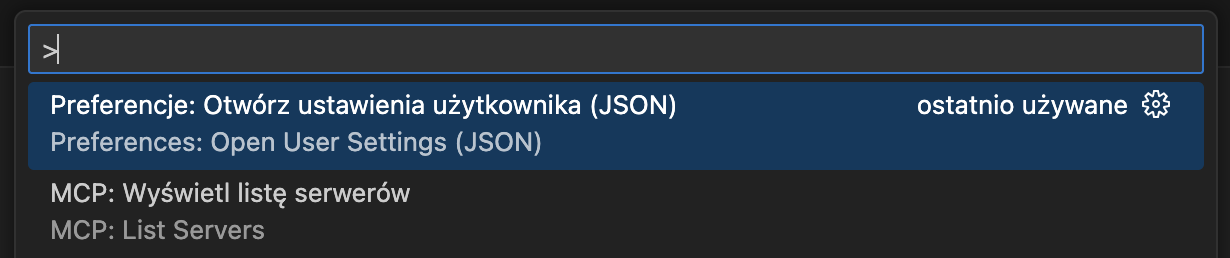

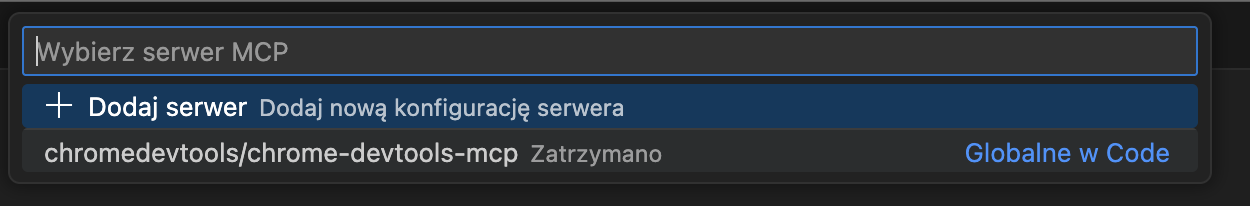

- W terminalu mogę sobie potwierdzić, że MCP działa poprawnie

In [ ]:
npx chrome-devtools-mcp --chrome "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome" --headless=false --isolated=true

In [ ]:
p@MacBook-Pro-p ~ % npx chrome-devtools-mcp --chrome "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome" --headless=false --isolated=true


chrome-devtools-mcp exposes content of the browser instance to the MCP clients allowing them to inspect,
debug, and modify any data in the browser or DevTools.
Avoid sharing sensitive or personal information that you do not want to share with MCP clients.

In [ ]:
2025-11-02 14:14:47.852 [info] Uruchamianie serwera chromedevtools/chrome-devtools-mcp
2025-11-02 14:14:47.853 [info] Stan połączenia: Uruchamianie
2025-11-02 14:14:47.853 [info] Starting server from LocalProcess extension host
2025-11-02 14:14:47.854 [info] Stan połączenia: Uruchamianie
2025-11-02 14:14:47.855 [info] Stan połączenia: W trakcie uruchamiania
2025-11-02 14:14:48.585 [warning] [server stderr] chrome-devtools-mcp exposes content of the browser instance to the MCP clients allowing them to inspect,
2025-11-02 14:14:48.585 [warning] [server stderr] debug, and modify any data in the browser or DevTools.
2025-11-02 14:14:48.585 [warning] [server stderr] Avoid sharing sensitive or personal information that you do not want to share with MCP clients.
2025-11-02 14:14:48.589 [info] Discovered 27 tools

#W konsoli chat wpisuję komendy

Otwórz stronę https://www.empik.com/, pobierz wszystkie żądania sieciowe i przefiltruj te do domen Google (np. google-analytics.com, googletagmanager.com, doubleclick.net, gstatic.com, recaptcha.net). Zwróć listę żądań (URL, metoda, status, typ zasobu, rozmiar, czas).

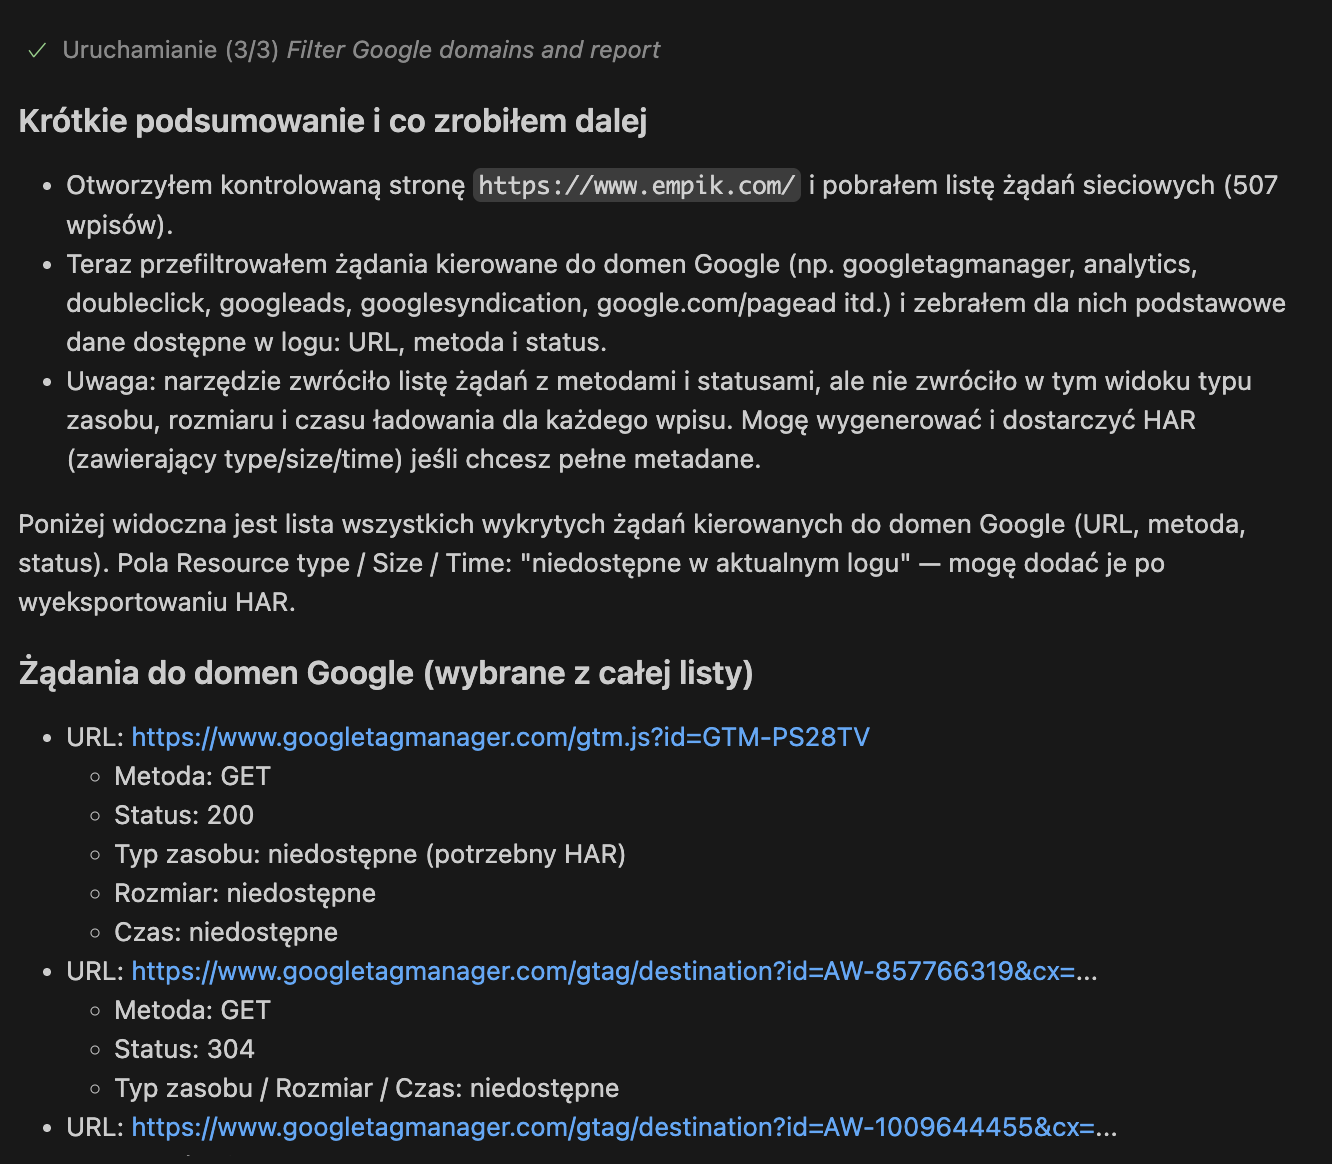

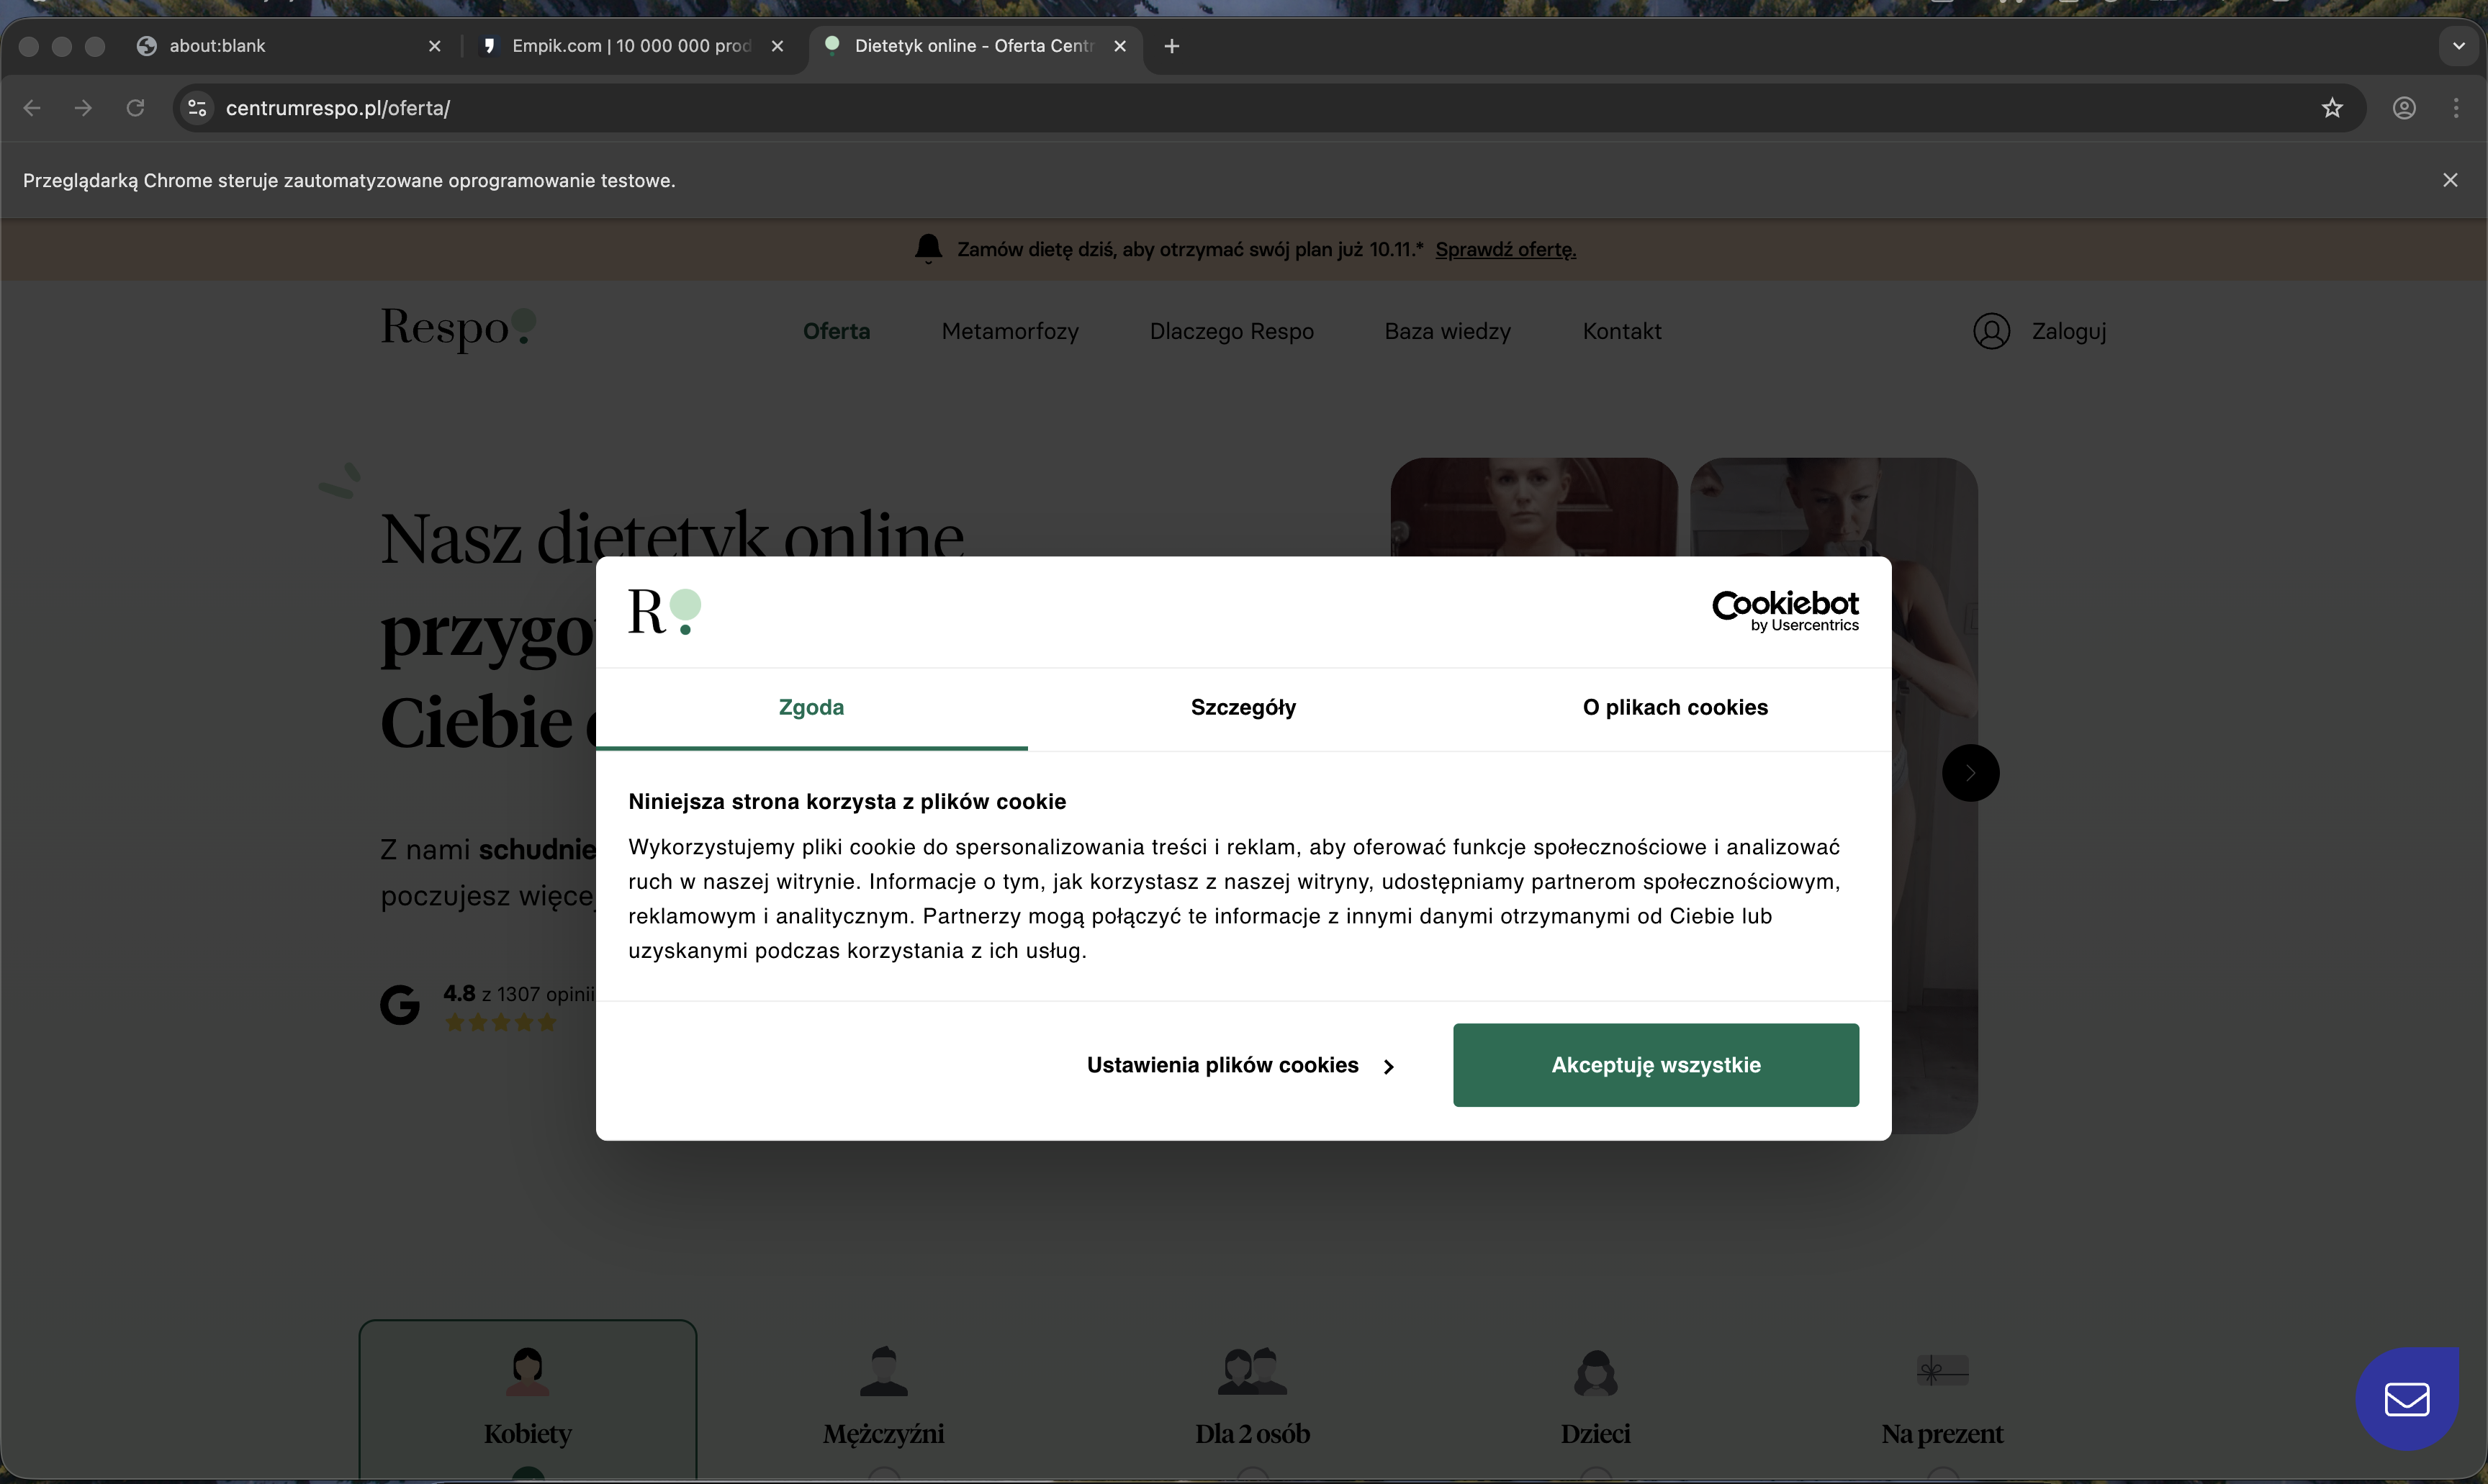

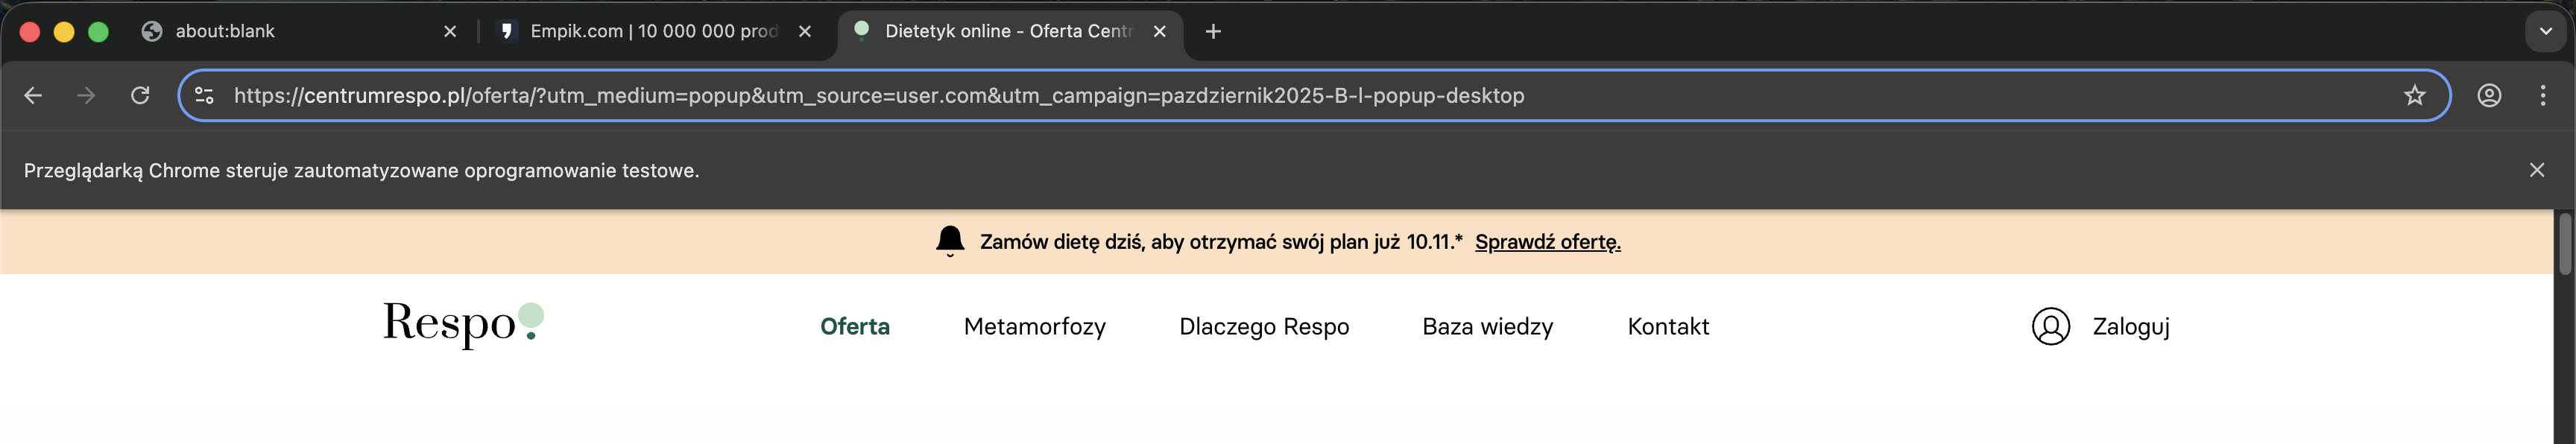

#Input Automation (8 tools)

https://github.com/ChromeDevTools/chrome-devtools-mcp/?tab=readme-ov-file#tools

##1️⃣ click

Instrukcja dotyczy karty produktu: https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Kliknij w przycisk „Dodaj do koszyka” na stronie produktu. Następnie sprawdź, czy w konsoli lub w Data Layer pojawił się event add_to_cart (np. gtm.push lub dataLayer.push) i pokaż jego szczegóły (wszystkie parametry eventów).

Wyniki przedstaw w formie zwięzłej tabeli gdzie w jednej kolumnie będę miał informacje jak jest, a w drugiej napisz mi jak powinno być zgodnie z najlepszymi praktykami.

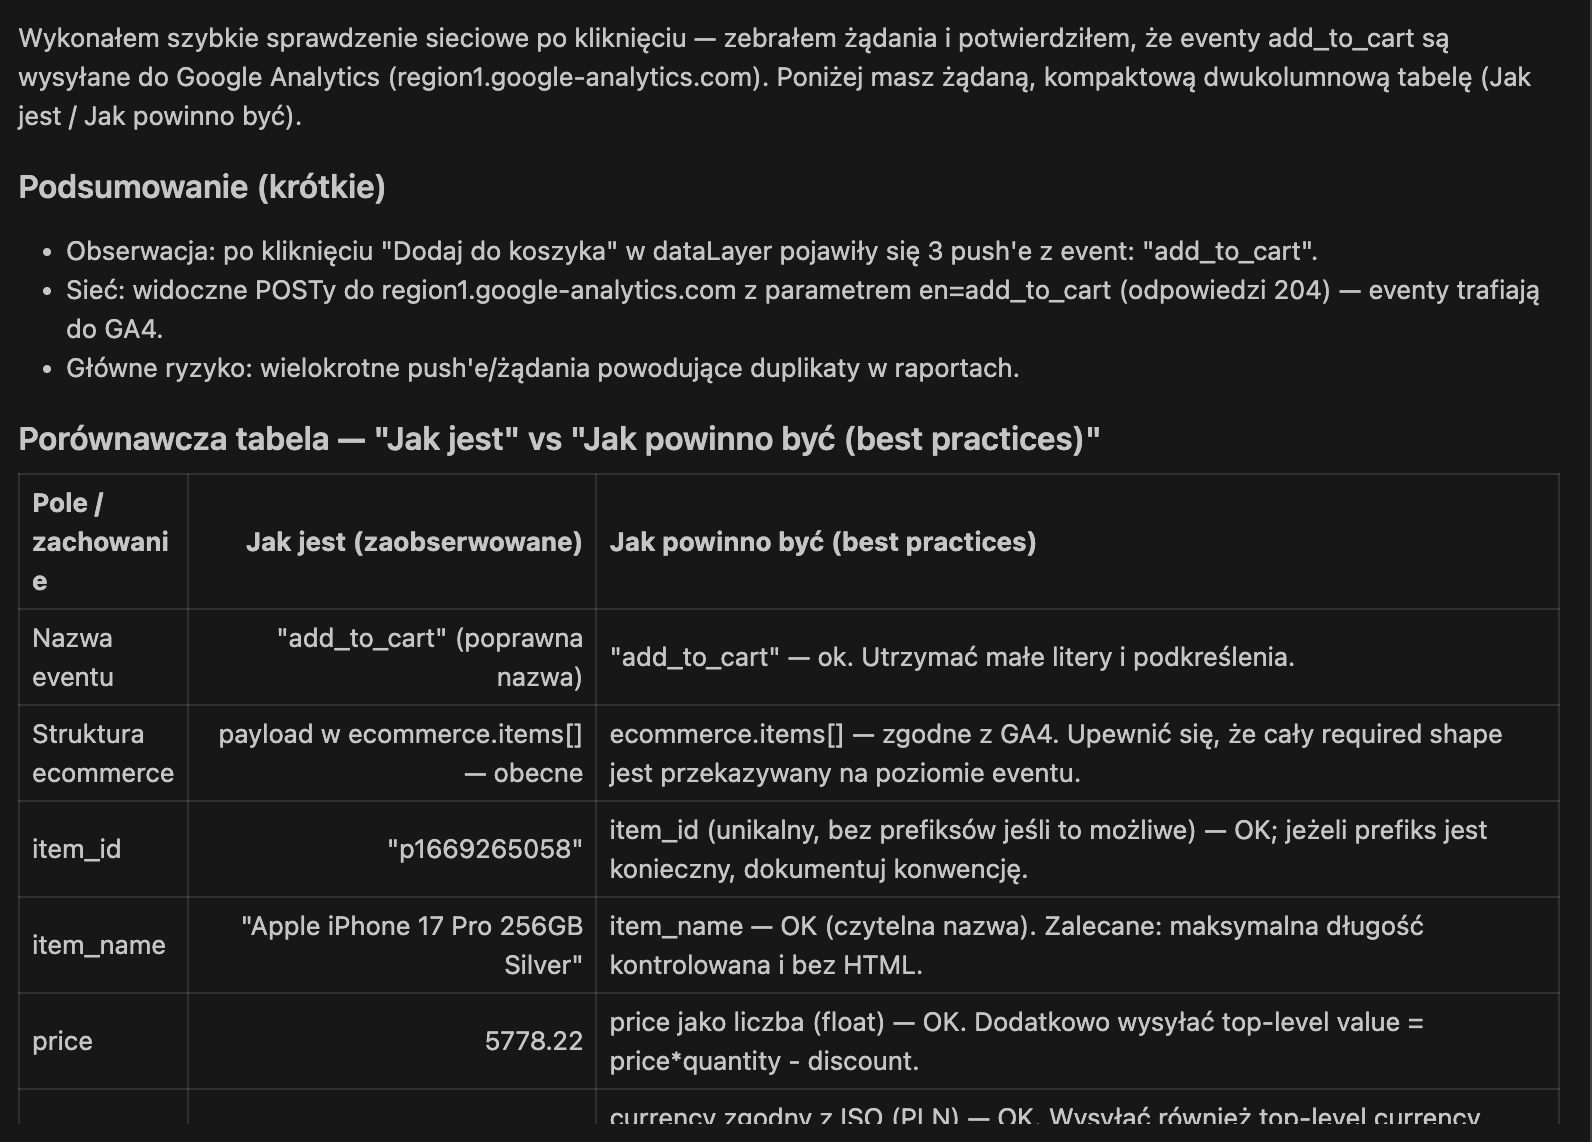

##2️⃣ drag

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Przeciągnij galerię zdjęć produktu z lewej do prawej, tak jakbyś przesuwał kolejne zdjęcie produktu.
Po wykonaniu akcji sprawdź w konsoli lub DevTools, czy zarejestrowano interakcje typu pointermove, mousedown, mouseup, scroll lub inne zdarzenia użytkownika.
Wyniki przedstaw w formie zwięzłej tabeli, gdzie w jednej kolumnie opiszesz Jak jest, a w drugiej Jak powinno być zgodnie z najlepszymi praktykami UX i analityki interakcji.


##3️⃣ fill

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Znajdź pole wyszukiwania (ikona lupy w górnym pasku nawigacji). Wprowadź tekst:
iphone 17 pro
i zasymuluj naciśnięcie klawisza Enter, aby uruchomić wyszukiwanie.
Następnie przeanalizuj w konsoli i w Network, jakie żądania zostały wysłane do API wyszukiwania (np. zapytania GET lub POST), oraz czy pojawił się event GA4 typu search.
Wyniki przedstaw w formie tabeli: Jak jest / Jak powinno być (np. poprawna struktura eventu search, obecność search_term, engagement_time_msec, itp.).

##4️⃣ fill_form

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Znajdź formularz zapisu do newslettera w stopce strony.
Wypełnij pola:
	•	Email: test.mcp@example.com
	•	Zgoda marketingowa: zaznacz „tak”
Kliknij przycisk „Zapisz się”.

Sprawdź, czy w konsoli lub Data Layer pojawił się event form_submit lub newsletter_signup oraz czy w Network wysłano request do odpowiedniego endpointu (np. /newsletter/subscribe).
Wyniki przedstaw w formie tabeli: Jak jest / Jak powinno być, z uwzględnieniem jakości danych (np. email_hash, event_name, method, status).

5️⃣ handle_dialog

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Po kliknięciu w przycisk „Dodaj do koszyka” obsłuż ewentualne wyskakujące okno dialogowe (np. popup z potwierdzeniem dodania produktu do koszyka).
Jeśli się pojawi – kliknij przycisk „Przejdź do koszyka” lub „Kontynuuj zakupy” (w zależności od opcji).
Następnie sprawdź, czy pojawiły się dodatkowe eventy w Data Layer (view_cart, begin_checkout, purchase).
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, z uwzględnieniem poprawności struktury eventów i kolejności interakcji użytkownika.

##6️⃣ hover

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Najedź kursorem na miniaturę zdjęcia produktu poniżej głównego zdjęcia.
Obserwuj, czy po najechaniu zmienia się główne zdjęcie produktu (src elementu <img> w sekcji galerii).
Sprawdź, czy hover jest rejestrowany jako interakcja (mouseover, mouseenter, mousemove) oraz czy w Data Layer pojawia się event niestandardowy (np. image_preview lub product_image_hover).
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, oceniając jakość danych i semantykę interakcji.


##7️⃣ press_key

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Kliknij w główne zdjęcie produktu, aby otworzyć powiększenie w lightboxie.
Następnie naciśnij klawisz Escape (ESC), aby zamknąć popup.
Zweryfikuj, czy popup faktycznie został zamknięty (kontener .modal lub .lightbox zniknął z DOM) i czy pojawił się event close_lightbox lub interaction_end w Data Layer.
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, z odniesieniem do poprawnej implementacji zamknięcia popupów i eventów interakcyjnych w GA4.

##8️⃣ upload_file

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Jeśli strona umożliwia dodanie opinii o produkcie, znajdź formularz opinii i wybierz pole do dodania zdjęcia produktu.
Użyj funkcji upload_file, aby przesłać plik testowy:
/Users/p/test_photo.jpg

Po przesłaniu sprawdź w Network, czy pojawił się POST z typem multipart/form-data, oraz czy w Data Layer wystąpił event review_photo_upload.
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, z oceną poprawności uploadu (status, rozmiar, typ pliku, event tracking).

#Navigation automation (6 tools)

##1️⃣ close_page

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Zamknij bieżącą kartę produktu, a następnie sprawdź w DevTools / Network, czy tuż przed zamknięciem strony wysyłane są eventy page_view, user_engagement, lub inne (np. session_end).
Zweryfikuj, czy wysłano dane do GA4 (collect?v=) zanim sesja się zakończyła.
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, oceniając m.in. poprawność wysyłki eventów zamykających sesję.

##2️⃣ list_pages

Instrukcja dotyczy sesji przeglądarki, w której otworzona jest strona produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Wypisz listę wszystkich otwartych zakładek (stron) w bieżącej instancji Chrome uruchomionej przez MCP.
Dla każdej strony podaj:
	•	pełny adres URL,
	•	tytuł strony (document.title),
	•	stan załadowania (loading / complete),
	•	czas otwarcia (jeśli dostępny).

Wyniki przedstaw w tabeli Jak jest / Jak powinno być, wskazując, które strony są aktywne i czy ich obsługa przez DevTools jest zgodna z praktykami debugowania wielokartowych sesji (multi-page tracking w GA4).

##3️⃣ navigate_page

Instrukcja dotyczy nawigacji z karty produktu do strony kategorii:
👉 Start: https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p
👉 Cel: https://www.empik.com/elektronika

Wykonaj automatyczną nawigację z karty produktu do strony kategorii Elektronika.
Po przejściu sprawdź:
	•	czy Data Layer zresetował stan (event: page_view z nowym page_location),
	•	czy pojawił się event view_item_list lub select_item,
	•	czy parametry page_referrer i page_title są poprawne.

Wyniki przedstaw w tabeli Jak jest / Jak powinno być, z naciskiem na poprawną implementację zdarzeń międzystronicowych w GA4.

##4️⃣ new_page

Instrukcja dotyczy otwarcia nowej karty dla strony kategorii:
👉 https://www.empik.com/elektronika

Otwórz nową kartę w przeglądarce MCP i załaduj stronę Elektronika.
Zweryfikuj:
	•	czy nowa karta jest widoczna w DevTools jako nowa sesja,
	•	czy zainicjowano event page_view z poprawnym session_id,
	•	czy client_id jest ten sam (czyli czy strona otworzyła się w tym samym kontekście GA4).

Wyniki przedstaw w tabeli Jak jest / Jak powinno być, oceniając poprawność inicjalizacji GA4 po otwarciu nowej karty.

##5️⃣ select_page

Instrukcja dotyczy sesji, w której otwarte są dwie karty:
1️⃣ Karta produktu: https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p
2️⃣ Karta kategorii: https://www.empik.com/elektronika

Użyj narzędzia select_page, aby przełączyć się z karty kategorii Elektronika z powrotem na kartę produktu iPhone 17 Pro.
Sprawdź, czy w momencie przełączenia aktywna strona ponownie wysyła event focus lub visibilitychange, oraz czy w GA4 generowany jest event page_engagement.
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, analizując poprawność reakcji strony na zmianę widoczności (typowy problem w SPA).

##6️⃣ wait_for

Instrukcja dotyczy karty produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Użyj wait_for, aby poczekać, aż element przycisku „Dodaj do koszyka” (button[data-testid="add-to-cart-button"] lub podobny) stanie się widoczny i gotowy do interakcji.
Po pojawieniu się elementu:
	•	sprawdź, czy event view_item został wysłany w GA4,
	•	czy atrybut data-product-id w elemencie zgadza się z ID produktu w Data Layer.
Wyniki przedstaw w tabeli Jak jest / Jak powinno być, z oceną poprawności inicjalizacji danych i synchronizacji renderowania DOM z Data Layer.

#Emulation (2 tools)

#Performance (3 tools)

##1️⃣ performance_analyze_insight

Instrukcja dotyczy strony produktu:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Uruchom analizę wydajności (performance_analyze_insight) dla tej strony produktu.
Zbadaj czynniki wpływające na opóźnienia w ładowaniu warstwy danych (Data Layer) oraz inicjalizacji GA4.
Skup się szczególnie na:
	•	czasie do pierwszego eventu view_item,
	•	liczbie skryptów trzecich stron (third-party scripts),
	•	kolejności ładowania tagów (czy GTM/GA4 inicjuje się przed renderowaniem produktu),
	•	obecności eventów błędów (error lub exception w konsoli).

Na podstawie zebranych danych utwórz tabelę Jak jest / Jak powinno być, z rekomendacjami optymalizacji dla:
	•	poprawy czasu inicjalizacji Data Layer,
	•	przyspieszenia załadowania GA4,
	•	uniknięcia opóźnień w śledzeniu pierwszych interakcji użytkownika.

##2️⃣ performance_start_trace

Instrukcja dotyczy ścieżki użytkownika w sklepie Empik:
👉 Start: https://www.empik.com/elektronika
👉 Następnie: kliknij w produkt i przejdź do strony: https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Rozpocznij śledzenie wydajności (performance_start_trace) od momentu załadowania strony kategorii Elektronika do pełnego wyrenderowania strony produktu.
Monitoruj i zarejestruj:
	•	czasy metryk: LCP, FID, CLS, TTFB,
	•	moment inicjalizacji kontenera GTM (czy gtm.js ładuje się po ),
	•	czas pojawienia się eventu page_view oraz view_item w Data Layer,
	•	ewentualne blokady renderowania (np. zbyt duże pliki JS / CSS).

Po zakończeniu testu przedstaw wyniki w tabeli Jak jest / Jak powinno być, z uwzględnieniem najlepszych praktyk wydajnościowych dla sklepów e-commerce (np. asynchroniczne ładowanie GTM, opóźnione third-party tags, lightweight tracking scripts).



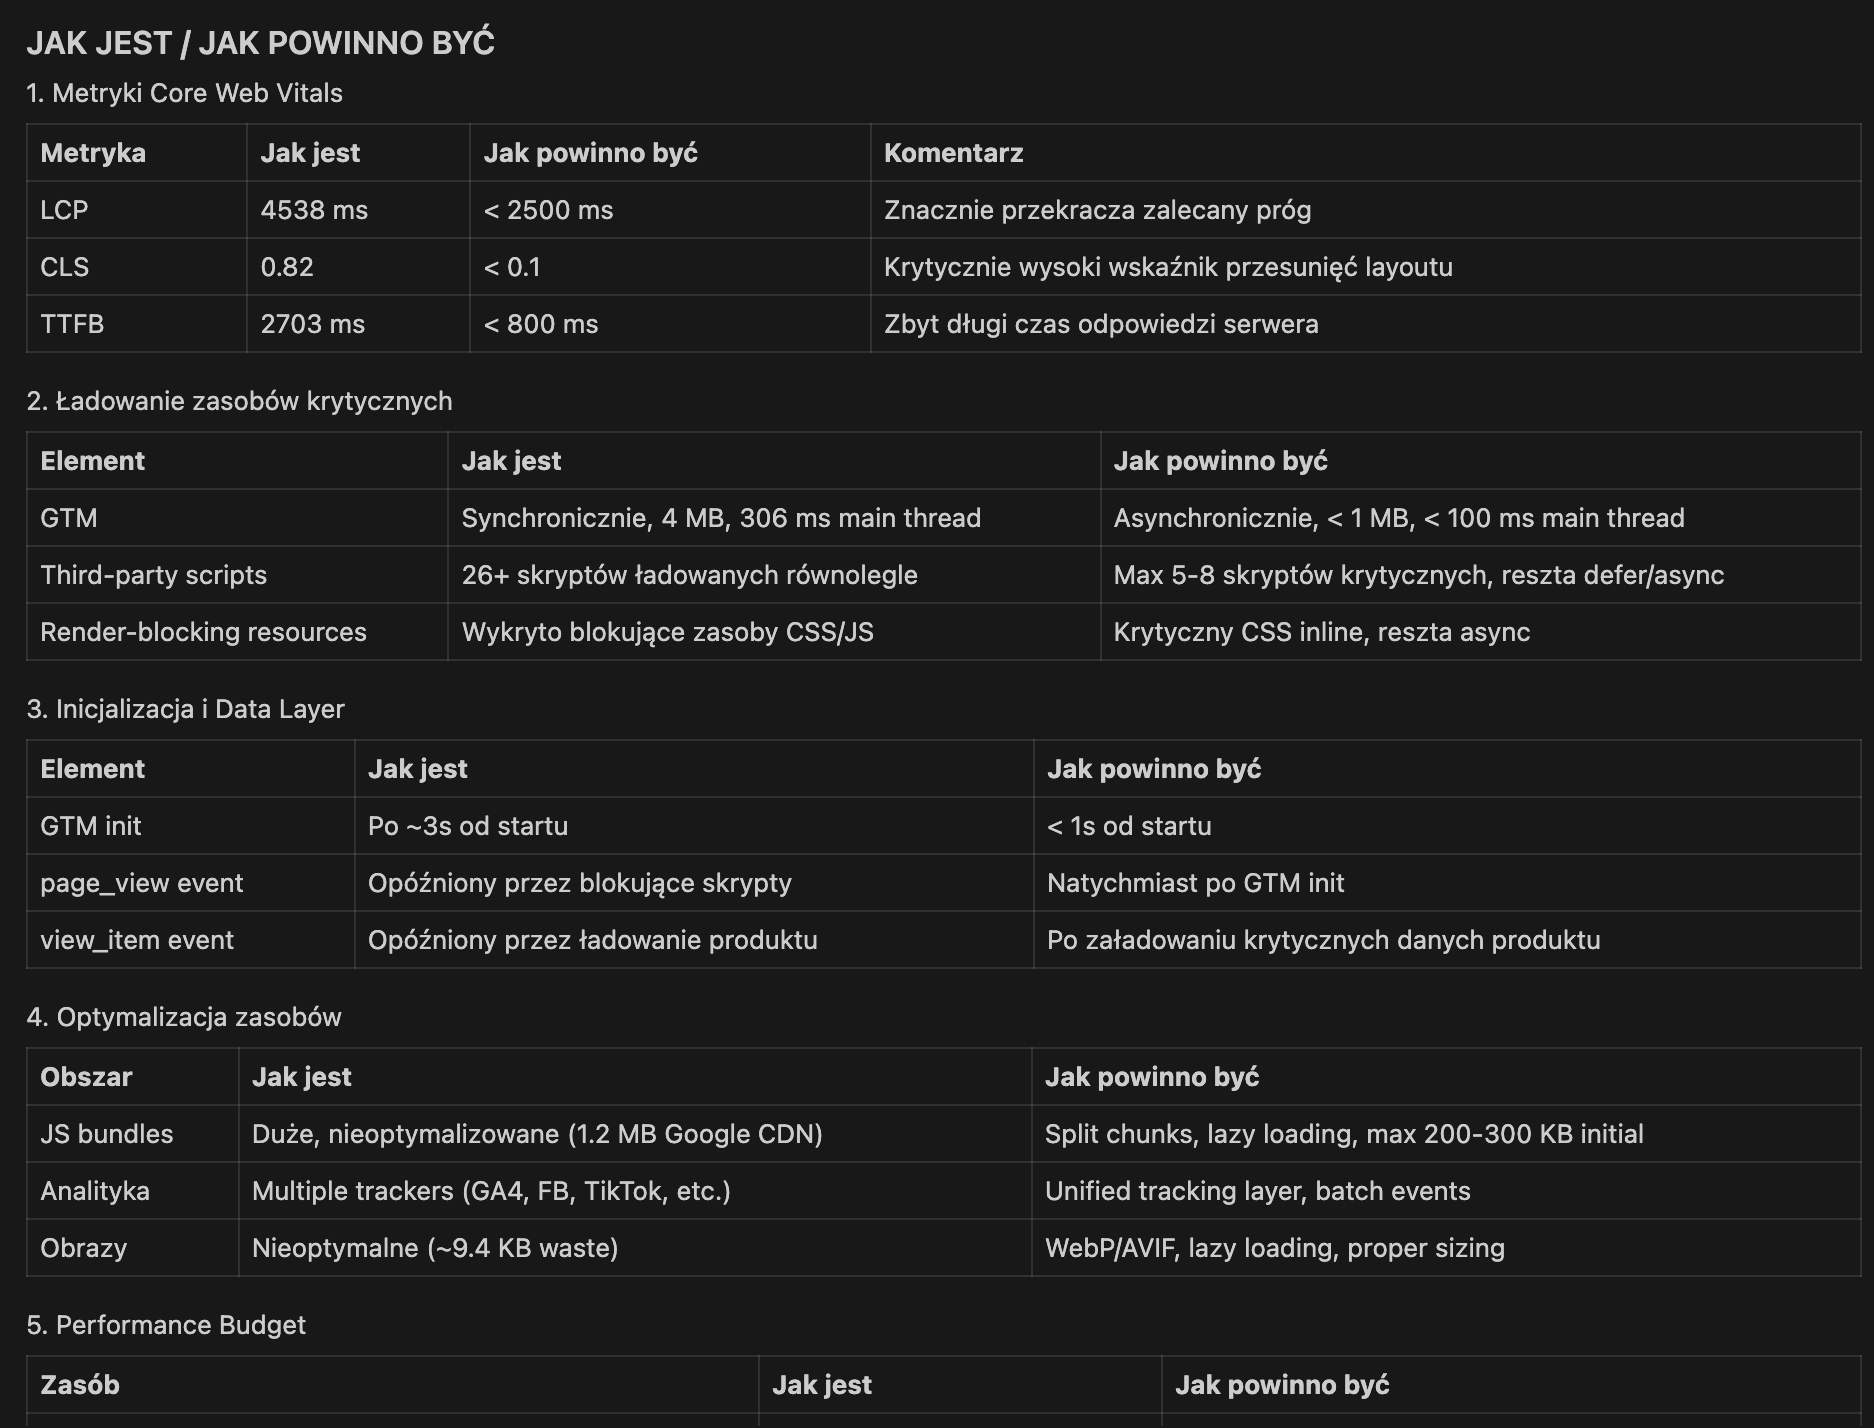

##3️⃣ performance_stop_trace

Instrukcja dotyczy końca śledzenia wydajności sesji użytkownika:
👉 https://www.empik.com/apple-iphone-17-pro-256gb-silver-apple,p1669265058,elektronika-p

Zatrzymaj śledzenie (performance_stop_trace) i wyeksportuj dane z trace’u (np. metryki czasowe, logi eventów, błędy konsoli).
Przeanalizuj, czy w trakcie sesji:
	•	eventy GA4 (view_item, add_to_cart, scroll, user_engagement) były wysyłane w odpowiednich momentach,
	•	nie wystąpiły błędy blocked by client (np. przez adblock),
	•	GTM nie opóźniał renderowania elementów UI,
	•	trace pokazuje poprawny balans między skryptami własnymi a zewnętrznymi.

Wyniki przedstaw w tabeli Jak jest / Jak powinno być, z wnioskami:
	•	jak zoptymalizować kolejność inicjalizacji eventów,
	•	jak skrócić czasy odpowiedzi GA4,
	•	jak zminimalizować wpływ analityki na wydajność UX.

#Network (2 tools)

#Debugging (5 tools)